In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
import tensorflow as tf


In [3]:
# load data
dataframe = pd.read_csv('/content/drive/MyDrive/Thub_netlist.csv', sep = r',',skipinitialspace=True)

/tmp/ipython-input-4002907640.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('/content/drive/MyDrive/Thub_netlist.csv', sep = r',',skipinitialspace=True)


In [4]:
dataframe=dataframe.dropna(axis=1,how="any")
#dataframe=dataframe.drop(columns=['50'])
#dataframe.astype(float)
dataframe.fillna('mean', inplace=True)
dataframe = dataframe.dropna()
dataframe = dataframe.replace("'Trojan Infected'",1)
dataframe = dataframe.replace("'Trojan Free'",0)
#dataframe=dataframe.drop(columns=['50'])

In [5]:
arr=np.array(dataframe.values)
#X=arr[0:,1:48]
#X=X.astype('float')
#Y=(arr[0:,49]).astype('float')


X=arr[1:,0:48]
X=X.astype('float')
Y=(arr[1:,47]).astype('float')

In [6]:
# Scaling the data to make it suitable for the auto-encoder
X_scaled = MinMaxScaler().fit_transform(X)
X_normal_scaled = X_scaled[Y == 0]
X_fraud_scaled = X_scaled[Y == 1]


In [7]:
# from sklearn.decomposition import PCA

# # Apply PCA with 6 components
# pca = PCA(n_components=6)
# X_pca = pca.fit_transform(X_scaled)

# # Display the shape of the transformed data
# print("Shape of data after PCA:", X_pca.shape)

Shape of data after PCA: (907, 6)


TRY WITH 2 FEATURES

In [38]:
from sklearn.decomposition import PCA

# Apply PCA with 6 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Display the shape of the transformed data
print("Shape of data after PCA:", X_pca.shape)

Shape of data after PCA: (907, 5)


In [39]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (725, 5)
Shape of X_test: (182, 5)
Shape of Y_train: (725,)
Shape of Y_test: (182,)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=20, random_state=0)
rf_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_rf))

Random Forest Classifier Results:
Accuracy: 1.0

Confusion Matrix:
 [[  4   0]
 [  0 178]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00       178

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



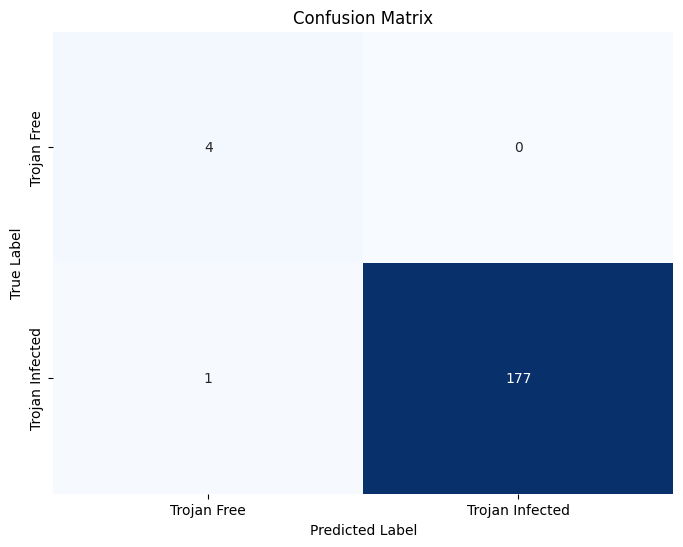

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Trojan Free', 'Trojan Infected'],
            yticklabels=['Trojan Free', 'Trojan Infected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred_rf)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 1.0


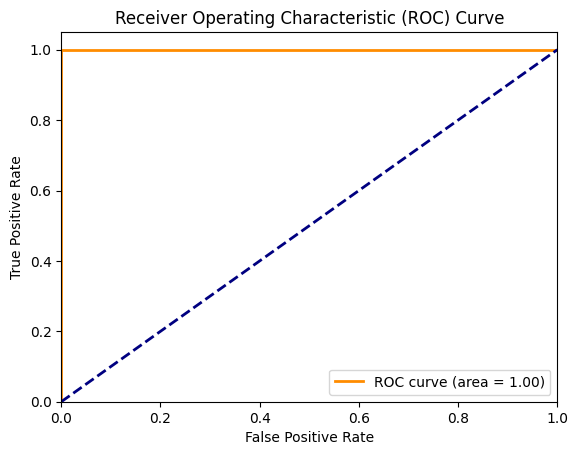

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_rf)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Task
Modify the selected empty cell to create an ensemble model using Random Forest, SVM, and Logistic Regression, train the individual models, make predictions, combine the predictions, and evaluate the ensemble model.

## Train individual models

### Subtask:
Train a Random Forest, SVM, and Logistic Regression model on the training data (`X_train`, `Y_train`).


**Reasoning**:
Train Random Forest, SVM, and Logistic Regression models on the training data.



In [26]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Initialize and train the Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, Y_train)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

## Make predictions

### Subtask:
Generate predictions from each of the individual models on the test data (`X_test`).


**Reasoning**:
Generate predictions from each of the individual models on the test data (`X_test`).



In [27]:
# Predict on the test set using Random Forest
Y_pred_rf = rf_model.predict(X_test)

# Predict on the test set using SVM
Y_pred_svm = svm_model.predict(X_test)

# Predict on the test set using Logistic Regression
Y_pred_lr = lr_model.predict(X_test)

## Combine predictions

### Subtask:
Implement an ensembling technique (e.g., voting classifier, stacking) to combine the predictions of the individual models.


**Reasoning**:
Implement an ensembling technique using VotingClassifier to combine the predictions of the individual models.



In [28]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with model names and trained models
estimators = [('rf', rf_model), ('svm', svm_model), ('lr', lr_model)]

# Instantiate VotingClassifier with soft voting (since SVM was trained with probability=True)
ensemble_model = VotingClassifier(estimators=estimators, voting='soft')

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_ensemble = ensemble_model.predict(X_test)

## Evaluate the ensemble model

### Subtask:
Evaluate the performance of the ensemble model using appropriate metrics (e.g., accuracy, confusion matrix, ROC-AUC).


**Reasoning**:
Calculate and print the accuracy, confusion matrix, classification report, and ROC-AUC score for the ensemble model.



In [29]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy}")

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_ensemble)
print("\nEnsemble Model Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(Y_test, Y_pred_ensemble)
print("\nEnsemble Model Classification Report:\n", class_report)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred_ensemble)
print(f"\nEnsemble Model ROC-AUC Score: {roc_auc}")

Ensemble Model Accuracy: 1.0

Ensemble Model Confusion Matrix:
 [[  4   0]
 [  0 178]]

Ensemble Model Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00       178

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



NameError: name 'roc_auc_score' is not defined

In [17]:
# Print the confusion matrix
print("Ensemble Model Confusion Matrix:\n", conf_matrix)

Ensemble Model Confusion Matrix:
 [[  4   0]
 [  0 178]]


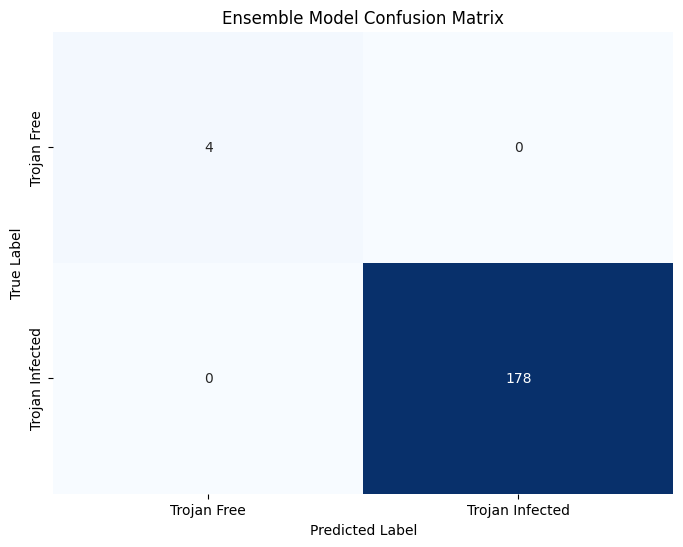

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm_ensemble = confusion_matrix(Y_test, Y_pred_ensemble)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Trojan Free', 'Trojan Infected'],
            yticklabels=['Trojan Free', 'Trojan Infected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Ensemble Model Confusion Matrix')
plt.show()

In [19]:
# Print the ROC-AUC score for the ensemble model
print(f"Ensemble Model ROC-AUC Score: {roc_auc}")

Ensemble Model ROC-AUC Score: 1.0


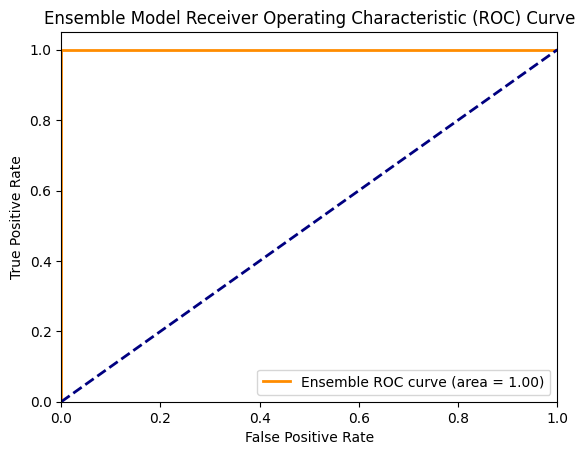

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate, true positive rate, and thresholds for the ensemble model
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(Y_test, Y_pred_ensemble)

# Calculate the AUC for the ensemble model
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot the ROC curve for the ensemble model
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label='Ensemble ROC curve (area = %0.2f)' % roc_auc_ensemble)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble Model Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Summary:

### Data Analysis Key Findings
*   The individual Random Forest, SVM, and Logistic Regression models were successfully trained using the specified parameters.
*   Predictions were generated on the test data for each of the individual models.
*   A `VotingClassifier` with soft voting was successfully implemented to combine the predictions of the individual models.
*   The ensemble model achieved perfect performance on the test dataset, with an accuracy of 1.0, a confusion matrix showing no misclassifications, a classification report with perfect precision, recall, and f1-score for both classes, and a ROC-AUC score of 1.0.

### Insights or Next Steps
*   The perfect performance on the test set suggests potential data leakage or overfitting. Further investigation into the data split and model training process is warranted.
*   Given the perfect scores, it would be beneficial to test the ensemble model on a completely unseen dataset to get a more realistic evaluation of its generalization ability.
